## ACML Assigment 1B 2022 
Fezile Mahlangu 2089676

Asteroseismology is the study of oscillations in stars. This dataset is a binary classification were we classify between defining oscillating stars ascending the red giant branch (class 0) and those that have commenced helium core burning (class 1)

Columns description:

Pop:[0/1] where 0=RGB (Red Giant Branch) and 1=HeB (Helium Burning)

Dnu: Mean large frequency separation of modes with the same degree and consecutive order

numax: Frequency of maximum oscillation power

epsilon: Location of the l=0 mode (2)


In [66]:
# imports
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as pyplot
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [485]:
#read in csv file 
df = pd.read_csv('asteroseismology.csv') #read in csv

# df = df.sample(frac=1).reset_index(drop=True) #randomize rows


df.info()

print(df.to_string()) #print out csv
# print(df.head())

df=df.sort_values("POP")
# print(df.to_string())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   POP      1001 non-null   int64  
 1   Dnu      1001 non-null   float64
 2   numax    1001 non-null   float64
 3   epsilon  1001 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 31.4 KB
      POP       Dnu      numax  epsilon
0       1   4.44780   43.06289    0.985
1       0   6.94399   74.07646    0.150
2       1   2.64571   21.57891    0.855
3       1   4.24168   32.13189    0.840
4       0  10.44719  120.37356    0.275
5       1   4.31470   37.59315    0.945
6       1   4.46724   46.71595    0.985
7       0   7.63714   87.44575    0.215
8       1   4.07682   34.78433    0.885
9       1   4.15871   31.50166    0.855
10      0   9.43448  108.11181    0.205
11      1   3.90815   33.33387    0.810
12      0   5.56773   53.39078    0.120
13      0   5.70470   56.78251    0.105
14      1   4.4

### Visualisation of the whole dataset

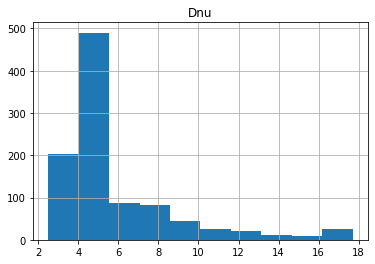

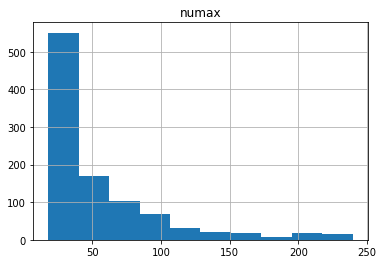

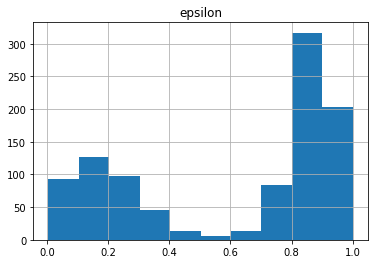

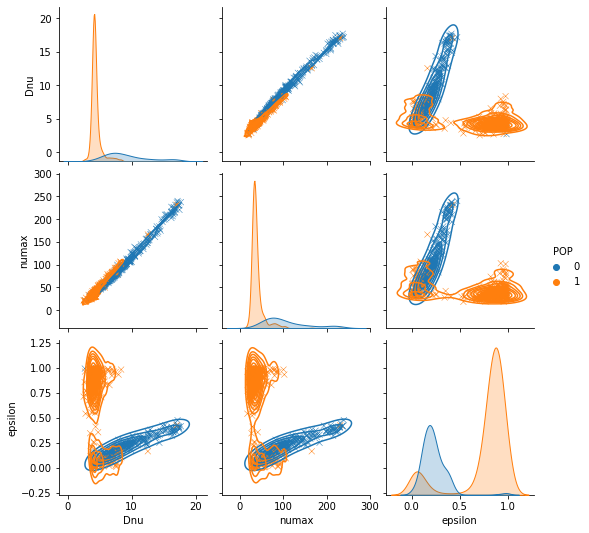

In [234]:
df.hist(column='Dnu') #histogram 
df.hist(column='numax') #histogram
df.hist(column='epsilon') #histogram

myseaborn = sns.pairplot(df, hue='POP', markers='x') #pair plot using seaborn 
myseaborn = myseaborn.map_upper(sns.kdeplot)
myseaborn = myseaborn.map_lower(sns.kdeplot)

Based on observations, the higher Dnu, numax and epsilon values belong to class 1. Only a small fraction of the stars' features overlap and will not be easily distinguished. Also worth noting that all the features have varying ranges. Dnu ranges between 0-18, numax ranges between 0-250 and epsilon ranges between 0-1. 

In [511]:
# DATA IS SPLIT INTO TRAINING, TESTING AND VALIDATION DATASETS 
# 60% TRAINING
# 20% VALIDATION
# 20% TESTING

testingData = pd.read_csv('TestingAsteroseismology.csv')
testingData=testingData.sort_values("POP") #sort by POP

trainingData = pd.read_csv('TrainingAsteroseismology.csv')
trainingData=trainingData.sort_values("POP") #sort by POP

validationData = pd.read_csv('ValidationAsteroseismology.csv')

#getting the dimensions
rows, col = trainingData.shape
rowsTest, colTest= testingData.shape
rowsValid, colValid = validationData.shape

#extrating the target column
yTraining=trainingData['POP'].values
yTesting=testingData['POP'].values
yValidation=validationData['POP'].values

#extracting the features 
XTraining = trainingData.drop(['POP'], axis=1).values # Input Feature Values
XTesting = testingData.drop(['POP'], axis=1).values # Input Feature Values
XValidation = validationData.drop(['POP'], axis=1).values # Input Feature Values

#implementing the design matrix 
XTraining = np.hstack(((np.ones((rows,1))), XTraining)) #design matrix (append 1 as a bias)
XTesting = np.hstack(((np.ones((rowsTest,1))), XTesting)) #design matrix (append 1 as a bias)
XValidation = np.hstack(((np.ones((rowsValid,1))), XValidation)) #design matrix (append 1 as a bias)

#We will now extract mean, standard deviation, min and max of every feature which will be used for feature scaling later on.
XValidationScale=np.copy(XValidation)
XValidationStandard=np.copy(XValidation)
XValidationReg=np.copy(XValidation)

print(validationData.describe())
#Storing mean from each feature from the validation data set 
validationFeatureMean=[]
validationFeatureMean.append(validationData.describe()['Dnu']['mean'])
validationFeatureMean.append(validationData.describe()['numax']['mean'])
validationFeatureMean.append(validationData.describe()['epsilon']['mean'])

#Storing mean from each feature from the testing data set 
testingFeatureMean=[]
testingFeatureMean.append(testingData.describe()['Dnu']['mean'])
testingFeatureMean.append(testingData.describe()['numax']['mean'])
testingFeatureMean.append(testingData.describe()['epsilon']['mean'])

#Storing standard deviation from each feature from the validation data set
validationFeatureStd=[]
validationFeatureStd.append(validationData.describe()['Dnu']['std'])
validationFeatureStd.append(validationData.describe()['numax']['std'])
validationFeatureStd.append(validationData.describe()['epsilon']['std'])

#Storing standard deviation from each feature from the testing data set
testingFeatureStd=[]
testingFeatureStd.append(testingData.describe()['Dnu']['std'])
testingFeatureStd.append(testingData.describe()['numax']['std'])
testingFeatureStd.append(testingData.describe()['epsilon']['std'])

#Storing standard min from each feature from the validation data set
validationFeatureMin=[]
validationFeatureMin.append(validationData.describe()['Dnu']['min'])
validationFeatureMin.append(validationData.describe()['numax']['min'])
validationFeatureMin.append(validationData.describe()['epsilon']['min'])

#Storing standard max from each feature from the validation data set
validationFeatureMax=[]
validationFeatureMax.append(validationData.describe()['Dnu']['max'])
validationFeatureMax.append(validationData.describe()['numax']['max'])
validationFeatureMax.append(validationData.describe()['epsilon']['max'])


              POP         Dnu       numax     epsilon
count  201.000000  201.000000  201.000000  201.000000
mean     0.706468    5.858841   59.901265    0.614005
std      0.456517    3.345402   48.978395    0.344752
min      0.000000    2.704660   18.198360    0.005000
25%      0.000000    4.059740   33.353370    0.220000
50%      1.000000    4.276220   37.482430    0.820000
75%      1.000000    6.361780   64.496230    0.890000
max      1.000000   17.699430  237.110610    0.995000


### Linear Regression

Our hypothesis function will be $h_\theta(x) = \theta_{0}+\theta_{1}x_{1}+ \theta_{2}x_{2}+\theta_{3}x_{3}+\theta_{4}x_{4}+\theta_{5}x_{5}+\theta_{6}x_{6} = \sum \limits _{j=0} ^{d} \theta_{j}x_{j} $ where $d=3$

We will use gradient descent to update theta and minimize the error.

The gradient descent for linear regression formula is $\theta_{j}=\theta_{j}-\alpha \frac{1}{n} \sum \limits _{i=1} ^{n} (h_{\theta}(x^{i})-y^{i}) x_{j}^{i} $ for $j=0...d$

We will assume convergence when $||\theta_{new}-\theta_{old}||<\epsilon$ 

The cost function/least squares error will also be evaluated after each simultaneous update/iteration. The formula for this is $J(\theta)=\frac{{1}}{2n}\sum \limits _{i=1} ^{n} (h_{\theta}(x^{i})-y^{i})^{2} $ 

In [486]:
#Linear Regression function 
def LinearRegression(alpha,epsilon,thetas,newthetas,design_matrix,y_values,n):
    errors=[] #this will store all the cost function errors
 
    while np.linalg.norm(newthetas-thetas,2)>epsilon:
        thetas=newthetas
        h=np.dot(thetas,design_matrix.T) 
    
        t=np.dot(h-y_values.T,design_matrix) 

        newthetas=thetas-((alpha/n)*t) 

        #collecting the least squares (cost function J(theta)) errors after each simultaneous update 
        errors.append(pow((1/(2*n))*np.sum(np.dot(newthetas,design_matrix.T)-y_values),2)) 



    return newthetas,errors

For clarity: 

$h= \sum \limits _{j=0} ^{d} \theta_{j}x_{j}$

$t=\sum \limits _{i=1} ^{n} (h_{\theta}(x^{i})-y^{i}) x_{j}^{i}$


In [488]:
#This will calculate the accuracy of the model by counting how many prediction the model got correct and divide it by the number of y_values. 
#This will be then multiplied by 100 to give a percentage. 

def accuracy(predictedY,y_values):
    sum=0
    n=len(y_values)
    for i in range(n):
        if(predictedY[i]==y_values[i]):
            sum+=1
    return sum/n*100

In [538]:
#initialize learning rate alpha 
alpha=0.0001

#initialize error limit 
epsilon=0.000005

#1st iteration of gradient descent update


#initialize thetas to be zeros
thetas=np.zeros(col) 
newthetas=np.zeros(col)
h=np.matmul(thetas,XTraining.T)
t=np.dot(h-yTraining,XTraining)
newthetas=thetas-((alpha/rows)*t)


#Run linear regression 
errors=[]
trainNewthetas,errors=LinearRegression(alpha,epsilon,thetas,newthetas,XTraining,yTraining,rows)

print("updated weights")
print(newthetas)

print(f"Error {errors[len(errors)-1]}")

predictedY=np.round(np.dot(trainNewthetas,XTraining.T))
acc=accuracy(predictedY,yTraining)
print("The model predicted values of Asteroseismology training dataset with an accuracy of "+str(acc)+" %")




updated weights
[6.80000000e-05 3.04873753e-04 2.78144190e-03 5.15258333e-05]
Error 8.91231085469967e-05
The model predicted values of Asteroseismology training dataset with an accuracy of 88.66666666666667 %


Text(0, 1, 'Figure 4')

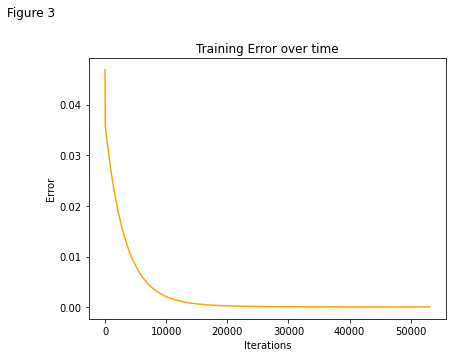

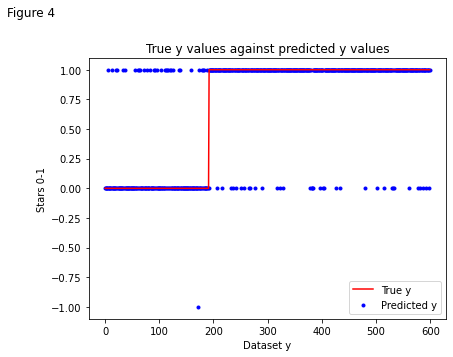

In [506]:
#plotting error over time
fig,ax=pyplot.subplots()
t=np.array(range(0,len(errors),1))
ax.plot(t,errors,c='orange',label='Error over time')
ax.set_title('Training Error over time')
ax.set_ylabel("Error")
ax.set_xlabel("Iterations")
txt="Figure 3"
pyplot.figtext(0, 1, txt, wrap=True, horizontalalignment='center', fontsize=12)

#plotting gradient descent againts original values
fig,ax=pyplot.subplots()

ax.plot(np.arange(0,rows,1),yTraining,label="True y",color='red')

ax.scatter(np.arange(0,rows,1),predictedY.T,marker='.',label="Predicted y",color='blue')

ax.set_ylabel("Stars 0-1")
ax.set_xlabel("Dataset y")
ax.set_title('True y values against predicted y values')
ax.legend()
ax.legend(loc='lower right')
txt="Figure 4"
pyplot.figtext(0, 1, txt, wrap=True, horizontalalignment='center', fontsize=12)


Figure 3 shows that as the model keeps updating the theta values, the error decreases over time. Figure 4 shows the true y values(red) against the predicted y values (blue). It clearly shows how the model predicts on data it has seen before. We have yet to see how it performs on data it has not seen before. The blue dots not aligned with the red line shows that the model still predicts a number of the data points incorrectly. 

In [508]:
#seeing how the current model performs on the testing data set 
predictedY=np.round(np.dot(trainNewthetas,XTesting.T))

acc=accuracy(predictedY,yTesting)
print(f"The model predicted values of Asteroseismology testing dataset with an accuracy of {acc} %")


The model predicted values of Asteroseismology testing dataset with an accuracy of 63.0 %


The model produced by normal gradient descent on the training data performs rather poorly on the testing dataset and we shall now try techniques for improved learning

### Exploring different learning 

We will explore different learning rates (alphas) and choose the one that gives the best accuracy. This will be done using the validation data set.

In [496]:
#this function will take in different alpha values and perform linear regression using the alpha value and then print out the accuracy 
def Explore(alpha):
    thetas=np.zeros(col)
    newthetas=np.zeros(col)
    h=np.matmul(thetas,XValidation.T)
    t=np.dot(h-yValidation,XValidation)
    newthetas=thetas-((alpha/rowsValid)*t)

    newthetas,errors=LinearRegression(alpha,epsilon,newthetas,thetas,XValidation,yValidation,rowsValid)
    predictedY=np.round(np.dot(newthetas,XValidation.T))
    acc=accuracy(predictedY,yValidation)
    print(f"The model predicted values of Asteroseismology dataset with an accuracy of {acc} % when alpha = {alpha}")
    return errors

In [497]:
#this function will plot the error over time by taking in an array of errors, teh colour that will be used by the graph and the alpha value used
def plot(errors,colour,alpha):

    fig,ax=pyplot.subplots()
    t=np.array(range(0,len(errors),1))
    ax.plot(t,errors,c=colour,label='Error over time')
    ax.set_title(f'Training Error over time when alpha = {alpha}')
    ax.set_ylabel("Error")
    ax.set_xlabel("Iterations")


The model predicted values of Asteroseismology dataset with an accuracy of 0.0 % when alpha = 0.01
The model predicted values of Asteroseismology dataset with an accuracy of 0.0 % when alpha = 0.07
The model predicted values of Asteroseismology dataset with an accuracy of 0.0 % when alpha = 0.001
The model predicted values of Asteroseismology dataset with an accuracy of 83.08457711442786 % when alpha = 0.0001
The model predicted values of Asteroseismology dataset with an accuracy of 0.0 % when alpha = 0.0005
The model predicted values of Asteroseismology dataset with an accuracy of 80.59701492537313 % when alpha = 5e-05
The model predicted values of Asteroseismology dataset with an accuracy of 18.90547263681592 % when alpha = 5e-06
The model predicted values of Asteroseismology dataset with an accuracy of 27.860696517412936 % when alpha = 9e-06
The model predicted values of Asteroseismology dataset with an accuracy of 21.890547263681594 % when alpha = 9e-07

Certains graphs will be dis

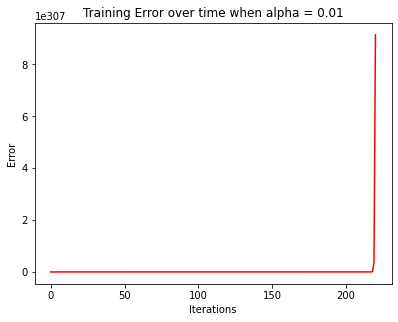

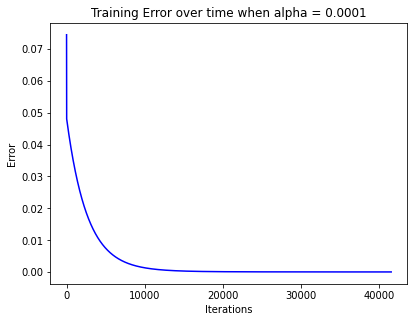

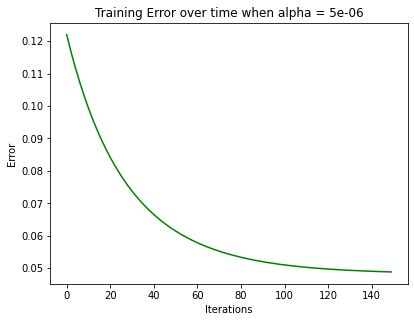

In [521]:

Explore(0.01)
Explore(0.07)

errors=Explore(0.001)
plot(errors,"red",0.01) #plot error over time 

errors=Explore(0.0001)
plot(errors,"blue",0.0001)
# print(len(errors))

Explore(0.0005)

Explore(0.00005)

errors=Explore(0.000005)
plot(errors,"green",0.000005)

Explore(0.000009)
Explore(0.0000009)
print()
print("Certains graphs will be displayed which depicts the errors over time for when a specific learning rate is applied. The x axis will show the number of iterations therefore it will show the error after each update of theta (the weights).")


All the errors where the accuracy is 0.0% have a graph that looks like the first one. In these graphs it shows that the error is low at first but then diverges to infinity. This shows  that the gradient descent does not converge because of a bad learning rate, meaning the alpha is too big and ends up overshooting the minimum and fails to converge. This also suggests that the weights need to be updated at a slower learning rate. 
The last graph is for when alpha=0.000005 and the accuracy for it is 18.91%. Similar graphs are depicted for errors with a low accuracies such as this one. Although the gradient descent converges, this suggests that the alpha value is too low and converges at a slower rate. The x axis depicts the number of iterations done by the algorithm, and this graph shows 140 iterations which shows that it did not update the weights enough (especially compared to other graphs like graph 2, which has 40000 iterations) and hence has bad accuracy since it did not learn the data set enough. 
After exploring different alpha values, the conclusion is that the best learning rate value for the gradient descent algorithm is when alpha = 0.0001. Note that gradient descent using the best alpha value took about 40000 iterations (looking at the x axis of the second graph)

### Linear Regression with feature Standardization

For each feature, we will standardize it such that there is zero mean and unit variance 

To standardize we will perform $x_{j}=\frac{{x_{j}-\mu_{j}}}{s_{j}}$ where $j=1...d$ 

The difference in the range of the features make the gradient descent algorithm have different sizes(scales) in each step for each feature. Feature standardization will allow the algorithm to have a smoother path towards the minima because the weights will be updated at the same rate and this will likely help the algorithm converge faster. 

In [512]:
for i in range(col-1):
    # print(i)
    for j in range(rowsValid): #row by column
        XValidationStandard[j][i+1]=(XValidationStandard[j][i+1]-validationFeatureMean[i])/validationFeatureStd[i]

In [537]:
thetas=trainNewthetas.copy()
newthetas=np.zeros(col)
h=np.matmul(thetas,XValidationStandard.T)
t=np.dot(h-yValidation,XValidationStandard)
newthetas=thetas-((alpha/rowsValid)*t)

errors=[]
standNewthetas,errors=LinearRegression(alpha,epsilon,thetas,newthetas,XValidationStandard,yValidation,rowsValid) #run Linear Regression
# print(newthetas)

print("Standardization weights:")
print(standNewthetas)
print(f"Error {errors[len(errors)-1]}")

predictedY=np.round(np.dot(standNewthetas,XValidationStandard.T)) #predict
acc=accuracy(predictedY,yValidation)
print("The model predicted values of Asteroseismology dataset with an accuracy of "+str(acc)+" %")

Standardization weights:
[ 0.6781205   0.01611132 -0.19356183  0.28730716]
Error 0.0002008904418051398
The model predicted values of Asteroseismology dataset with an accuracy of 92.03980099502488 %


Text(0.5, 0, 'Iterations')

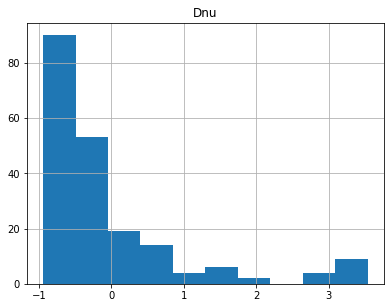

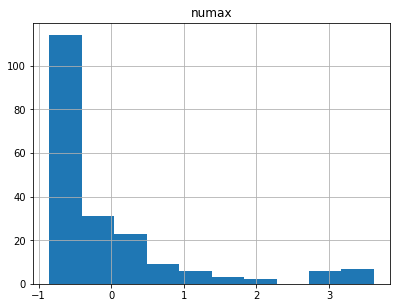

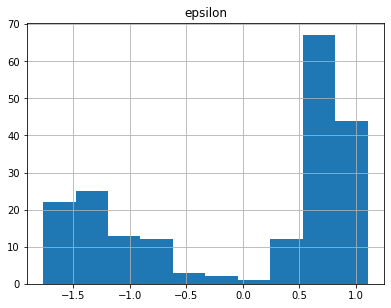

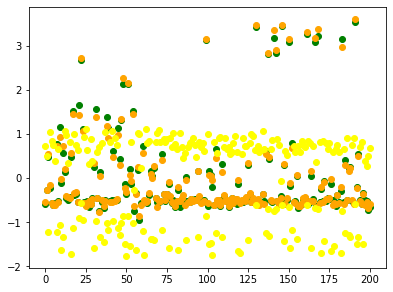

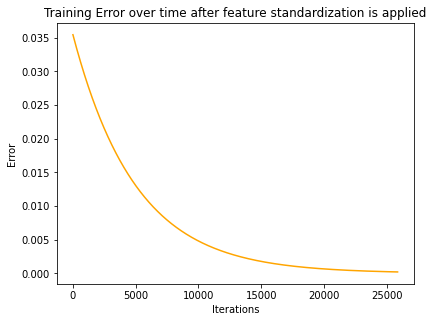

In [517]:
# print(XValidationScale)
Dnu=[]
numax=[]
eps=[]

for i in range(rowsValid):
    Dnu.append(XValidationStandard[i][1])
    numax.append(XValidationStandard[i][2])
    eps.append(XValidationStandard[i][3])
# making  a dataframe
dfStandard = pd.DataFrame({'Dnu': Dnu,'numax':numax,'epsilon':eps,'POP':yValidation})
# print(df.to_string())

dfStandard.hist(column='Dnu') #histogram
dfStandard.hist(column='numax') #histogram
dfStandard.hist(column='epsilon') #histogram

fig,ax=pyplot.subplots()

ax.scatter(np.arange(0,rowsValid,1),Dnu,label="Dnu",color='green')

ax.scatter(np.arange(0,rowsValid,1),numax,label="numax",color='orange')
ax.scatter(np.arange(0,rowsValid,1),eps,label="epsilon",color='yellow')

# pyplot.figure(figsize=(15,8))
# pyplot.subplot(221)
# pyplot.title("Dnu")
# sns.boxplot(y="Dnu", x="POP", data=dfStandard)
# pyplot.subplot(222)
# pyplot.title("numax")
# sns.boxplot(y="numax", x="POP", data=dfStandard)

#error over time 
fig,ax=pyplot.subplots()
t=np.array(range(0,len(errors),1))
ax.plot(t,errors,c='orange',label='Error over time')
ax.set_title(f'Training Error over time after feature standardization is applied')
ax.set_ylabel("Error")
ax.set_xlabel("Iterations")

The 3 histograms of the features show how feature standardization scaled the dataset to have similar ranges, this will ensure faster convergences. Feature standardization gives a better error shape. The smooth curve of the error (even though it updated the algorithm a number of times) might implies how smoothly it is getting to the minima. Also woth noting how it reached to a local minima faster. Normal gradient descent with the best learning rate took about 40000 iterations to reach its local minima with an accuracy of 83.08% while gradient descent after feature scaling has been applied took roughly 25000 iterations (looking at the x axis of the error graph) with an accuracy of 92.04%. This shows how feature scaling (standardization) can help the algorithm reach a local minima faster and also help the algorithm reach a different minima that might be better. 

### Linear Regression with Regularization 
Implementing regularization to see if it will make the model predict better. Regularization is a method that controls the complexity of weights by penalizing large values of theta.

Formula:

$\theta_{j}=\theta_{j} (1- \alpha\frac{{\lambda}}{n}) -\alpha \frac{1}{n} \sum \limits _{i=1} ^{n} (h_{\theta}(x^{i})-y^{i}) x_{j}^{i} $  for $j=0...d$

In [500]:
#gradient descent with regularization 

def LinearRegressionReg(alpha,myLambda,epsilon,thetas,RegNewthetas,XValidationReg,yValidation,rowsValid):
    
    errors=[]

    while np.linalg.norm(RegNewthetas-thetas,2)>epsilon:
        thetas=RegNewthetas
        h=np.dot(thetas,XValidationReg.T) 
    
        t=np.dot(h-yValidation.T,XValidationReg) 

        RegNewthetas=thetas*(1-((alpha)*(myLambda/rowsValid)))-((alpha/rowsValid)*t) #gradient update with lambda

        #collecting the least squares (cost function J(theta)) errors after each simultaneous update 
        errors.append(pow((1/(2*rowsValid))*np.sum(np.dot(RegNewthetas,XValidationReg.T)-yValidation),2)) 
        
    return RegNewthetas,errors
    



In [523]:
#this will plot error over time 
def plotReg(errors,colour,alpha,myLambda):

    fig,ax=pyplot.subplots()
    t=np.array(range(0,len(errors),1))
    ax.plot(t,errors,c=colour,label='Error over time')
    ax.set_title(f'Training Error over time when alpha = {alpha} and lambda = {myLambda}')
    ax.set_ylabel("Error")
    ax.set_xlabel("Iterations")

### Exploring learning rates and lambda for Regularization

In [427]:
#this function will run linear regression with regularization given an alpha and a lambda value and then print out the accuracy
def ExploreReg(alpha,myLambda):


    thetas=trainNewthetas.copy()
    h=np.dot(thetas,XValidationReg.T)

    t=np.dot(h-yValidation.T,XValidationReg)
 
    RegNewthetas=thetas*(1-((alpha)*(myLambda/rowsValid)))-((alpha/rowsValid)*t)

    RegNewthetas,errors=LinearRegressionReg(alpha,myLambda,epsilon,thetas,RegNewthetas,XValidationReg,yValidation,rowsValid)

    predictedY=np.round(np.dot(RegNewthetas,XValidationReg.T))
    acc=accuracy(predictedY,yValidation)
    print(f"The model predicted values of Asteroseismology dataset with an accuracy of {acc} % when alpha = {alpha} and lambda= {myLambda}")
    return RegNewthetas,errors
    

The model predicted values of Asteroseismology dataset with an accuracy of 86.06965174129353 % when alpha = 0.0001 and lambda= 0.05
The model predicted values of Asteroseismology dataset with an accuracy of 86.06965174129353 % when alpha = 0.0001 and lambda= 0.6
The model predicted values of Asteroseismology dataset with an accuracy of 86.56716417910447 % when alpha = 1e-05 and lambda= 0.0007
The model predicted values of Asteroseismology dataset with an accuracy of 0.0 % when alpha = 0.1 and lambda= 0.7
The model predicted values of Asteroseismology dataset with an accuracy of 0.0 % when alpha = 0.01 and lambda= 0.0007
The model predicted values of Asteroseismology dataset with an accuracy of 86.06965174129353 % when alpha = 0.0001 and lambda= 4
The model predicted values of Asteroseismology dataset with an accuracy of 86.56716417910447 % when alpha = 1e-05 and lambda= 3
The model predicted values of Asteroseismology dataset with an accuracy of 86.56716417910447 % when alpha = 1e-05 a

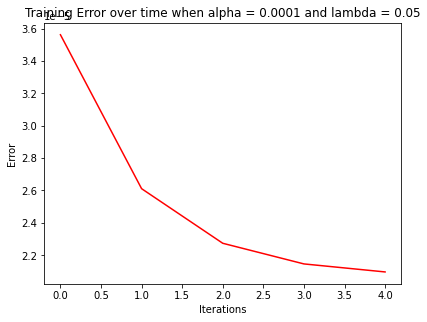

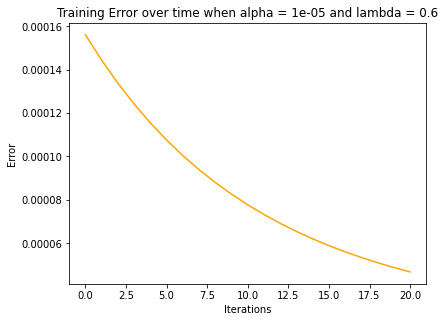

In [535]:
#exploring different alphha and lambda values 
t,errors=ExploreReg(0.0001,0.05)
plotReg(errors,"red",0.0001,0.05) #plot error over time

ExploreReg(0.0001,0.6)

ExploreReg(0.00001,0.0007)
ExploreReg(0.1,0.7)
ExploreReg(0.01,0.0007)
ExploreReg(0.0001,4)
ExploreReg(0.00001,3)

RegNewthetas,errorsReg=ExploreReg(0.00001,0.6)
plotReg(errorsReg,"orange",0.00001,0.6) #plot error over time 
print()
print("Regularization weights:")
print(RegNewthetas)
print(f"Error {errorsReg[len(errorsReg)-1]}")


After exploring different learning rates for alpha and lambda for regularization, the best alpha is alpha=0.00001 and lambda=0.6. It is worth noting how regularization performs slightly better than gradient descent but performs much worse than feature standardazation. 

### Testing model on unseen data 
Prediction on testing dataset using regularized weights:

The model predicted values of Asteroseismology Testing dataset with an accuracy of 90.0 %
This prediction was made using the weights generated by the regularization model with the best alpha and lambda values.


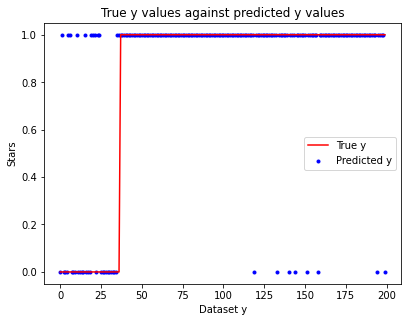

In [526]:
#seeing how the model performs on unseen data using Reg weights
predictedY=np.round(np.dot(RegNewthetas,XTesting.T))

acc=accuracy(predictedY,yTesting)
print("The model predicted values of Asteroseismology Testing dataset with an accuracy of "+str(acc)+" %")
print("This prediction was made using the weights generated by the regularization model with the best alpha and lambda values.")


fig,ax=pyplot.subplots()

ax.plot(np.arange(0,rowsTest,1),yTesting,label="True y",color='red')

ax.scatter(np.arange(0,rowsTest,1),predictedY.T,marker = '.',label="Predicted y",color='blue')

ax.set_ylabel("Stars")
ax.set_xlabel("Dataset y")
ax.set_title('True y values against predicted y values')
ax.legend()



This visual shows how the model predicted most of the dataset points accurately. Most of the blue dots(predicted y values) are in line with the red line(true y values). 

Prediction on the testing dataset using feature scaling weights, but first feature scaling will be done on the testing dataset:

In [528]:
for i in range(col-1):
    # print(i)
    for j in range(rowsTest): #row by column
        XTesting[j][i+1]=(XTesting[j][i+1]-testingFeatureMean[i])/testingFeatureStd[i]

In [529]:
#seeing how the model performs on unseen data
predictedY=np.round(np.dot(standNewthetas,XTesting.T))

acc=accuracy(predictedY,yTesting)
print(f"The model predicted values of Asteroseismology Testing dataset with an accuracy of {acc} %")


The model predicted values of Asteroseismology Testing dataset with an accuracy of 89.5 %


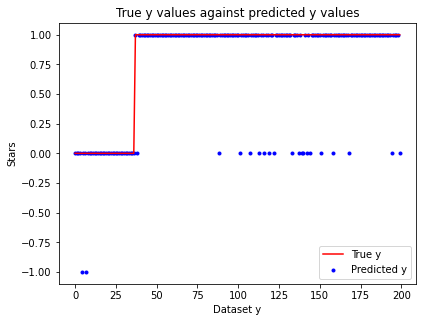

In [530]:

fig,ax=pyplot.subplots()
# print(y_values[0])
ax.plot(np.arange(0,rowsTest,1),yTesting,label="True y",color='red')

# predictedY=np.round(np.dot(newthetas,XTraining.T))
ax.scatter(np.arange(0,rowsTest,1),predictedY.T,marker = '.',label="Predicted y",color='blue')



ax.set_ylabel("Stars")
ax.set_xlabel("Dataset y")
ax.set_title('True y values against predicted y values')
ax.legend()


### Conclusion

Even though regularization had a worse accuracy than feature scaling on the validation dataset, it ended up performing better on unseen data (testing), probably because it generalized better and penalized some of the weights on the validation dataset which caused the relatively low accuracy. The best model predicts the unseen data with a decent accuracy of 90%. 